# Welcome to the WRF-Python Tutorial!

June 15, 2018

# Jupyter Notebook Quick Reference

**To execute a cell in jupyter notebook**:

1. Click on the desired cell.
2. Press **CTRL + RETURN** to execute the cell or press **SHIFT + RETURN** to execute the cell and advance to the next cell.
3. Alternatively, you can use the Cell dropdown menu

**If you accidentally double click on a Markdown Cell (cells with no code, only pretty text)**.

You will usually see text, and most likely blue '#' characters and letters
1. Simply execute the cell using the instructions above

**If you experience a problem and want to restart your notebook**:

1. Use the Kernel dropdown menu at the top.
2. Execute Kernel -> Restart & Clear Output.
3. Be sure the run **Example 1.1: Verifying your Jupyter Environment** before running any 
   other cells.


**Shutting down the notebook**

1. On your web browser, select the Home tab.
2. Click the check box next to wrf_workshop_2018.ipynb.
3. Click the Shutdown button that will become available after step 2.
4. Now go to the terminal window where you typed in "jupyter notebook".
5. With the terminal window active, press **CTRL + C**.


# 1.0 Introduction to jupyter, numpy, xarray

## Example 1.1 Verifying your Jupyter Environment

Looking at your own WRF data is much more fun than my examples!  If you have your own data files:

1. Place the WRF output files in to a single directory.  Pick two or three files to limit memory.
2. In the cell below, modify the **WRF_DIRECTORY** and **WRF_FILES** variables to point to your data.
3. Execute the cell and verify that "All Tests Passed!" is printed.
4. If not, raise your hand and one of the lab assistants will help.

**IMPORTANT: If for some reason your workbook crashes, you need to run this cell again before running the later examples**.

In [1]:
from __future__ import print_function

# This jupyter notebook command inserts matplotlib graphics in 
# to the workbook
%matplotlib inline

# Modify these to point to your own files
WRF_DIRECTORY = "~/wrf_tutorial_data"
WRF_FILES = ["wrfout_d01_2005-08-28_00_00_00",
             "wrfout_d01_2005-08-28_12_00_00",
             "wrfout_d01_2005-08-29_00_00_00"]


# Do not modify the code below this line
#------------------------------------------------------
# Turn off annoying warnings
import warnings
warnings.filterwarnings('ignore')

# Make sure the environment is good
import numpy
import cartopy
import matplotlib
from netCDF4 import Dataset
from xarray import DataArray
from wrf import (getvar, interplevel, vertcross, 
                 vinterp, ALL_TIMES)
import os

_WRF_FILES = [os.path.abspath(os.path.expanduser(
    os.path.join(WRF_DIRECTORY, f))) for f in WRF_FILES]

# Check that the WRF files exist
for f in _WRF_FILES:
    if not os.path.exists(f):
        raise ValueError("{} does not exist. "
            "Check for typos or incorrect directory.".format(f))

# Create functions so that the WRF files only need
# to be specified using the WRF_FILES global above
def single_wrf_file():
    global _WRF_FILES
    return _WRF_FILES[0]

def multiple_wrf_files():
    global _WRF_FILES
    return _WRF_FILES

print("All tests passed!")
    


All tests passed!


# Numpy Way-Too-Quick Reference

See https://docs.scipy.org/doc/numpy/user/quickstart.html for a much more complete introduction.

## Creating an Array

The zeros function creates an array with all 0's.  

Begin by specifying the desired shape as a tuple and then specify the data type (Note: "float32" is the default if not specified).

``` python
my_array = numpy.zeros((3,3,3), "float32")
```

## Accessing Elements

Use the "[ ]" syntax with the desired dimension indexes separated by commas.

``` python

# Getting an element
first_element = my_array[0,0,0]
last_element = my_array[-1,-1,-1]
mid_element = my_array[1,1,1]

# Setting an element
my_array[1,1,1] = 10.0

```

## Slices

Use the 'start : end' syntax for slicing.  

If *start* is left blank, the slice begins at the start of the array.  

If *end* is blank, the slice ends at the end of the array.

``` python
import numpy

my_array = numpy.zeros((3,3,3), "float32")

first_row = my_array[0,0,:]

first_column = my_array[0,:,0]

first_z = my_array[:,0,0]

subset = my_array[:, :, 1:3]

```

## MaskedArray

Use the *masked_{condition}* functions to create MaskedArray objects.

``` python

import numpy
import numpy.ma

my_array = numpy.zeros((3,3,3), "float32")

# Now all of the array elements are masked values
my_masked = numpy.ma.masked_equal(my_array, 0)

```


## Example 1.2: Numpy Basics

This example demonstrates the basics of creating a numpy array, getting and setting an array element, slicing, and masking values.

In [2]:
import numpy
import numpy.ma

my_array = numpy.zeros((3,3,3), "float32")

print("my_array")
print(my_array)
print("\n")

# Setting an element
my_array[1,1,1] = 10.0

# Getting an element
mid = my_array[1,1,1]

print("Mid element set")
print(my_array)
print("\n")

# Getting a slice
my_slice = my_array[1,:,:]

print("my_slice")
print(my_slice)
print("\n")

# Masking the zeros
my_masked = numpy.ma.masked_equal(my_array, 0)

print("my_masked")
print(my_masked)
print("\n")

my_array
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


Mid element set
[[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0. 10.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


my_slice
[[ 0.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  0.]]


my_masked
[[[-- -- --]
  [-- -- --]
  [-- -- --]]

 [[-- -- --]
  [-- 10.0 --]
  [-- -- --]]

 [[-- -- --]
  [-- -- --]
  [-- -- --]]]




# xarray Basic Way-Too-Quick Reference

See http://xarray.pydata.org/ for a much more complete reference on xarray.

## Creating an xarray DataArray


Arguments for creating a DataArray are:

- data [required]: A numpy array.
- coords [optional]: A dictionary of {dimension_name : coordinate_array}.
- dims [optional]: A list of dimension names from left to right.
- name [optional]: A name for the variable.
- attrs[optional]: A dictionary of {attr_name : attr_value}.

``` python

import numpy
import xarray

my_array = numpy.zeros((3,3,3), "float32")

# Making up dimension names and coordinates.
my_name = "my_xarray"

my_dims = ["bottom_top", "south_north", "west_east"]

my_coords = {"bottom_top" : [100., 200., 300.],
             "south_north": [40., 50., 60.],
             "west_east" : [-120., -110., -100.]
            }

my_attrs = {"info" : "This is my xarray"}

my_xarray = xarray.DataArray(my_array,
                             name=my_name,
                             dims=my_dims, 
                             coords=my_coords, 
                             attrs=my_attrs)

```

## xarray Arrays with Missing Values

- xarray always uses NaN for missing values.
- This can cause problems with compiled math rouines.
- The xarray.DataArray contains a .values property to get the numpy array, but this will not 
  replace the NaN values with the _FillValue values (see fillna and to_masked_array in xarray documentation).
- wrf-python has a *to_np* function that will handle the conversion to numpy for you and fill in the missing values if _FillValue is in the attributes.

## xarray Notes:

- xarray DataArrays support most of the numpy methods and attributes, but not all.
- xarray DataArrays are NOT numpy subclasses.  
- Often you need to extract the numpy array from the DataArray before passing the array to 
  a computational routine.
- However, the routines in wrf-python are xarray-aware and will do this for you.

## Example 1.3: Creating an xarray DataArray

Run the cell below to see what an xarray DataArray looks like.

In [3]:
import numpy
import xarray

my_array = numpy.zeros((3,3,3), "float32")

# Making up dimension names and coordinates.
my_name = "my_xarray"

my_dims = ["bottom_top", "south_north", "west_east"]

my_coords = {"bottom_top" : [100., 200., 300.],
             "south_north": [40., 50., 60.],
             "west_east" : [-120., -110., -100.]
            }

my_attrs = {"info" : "This is my xarray"}

my_xarray = xarray.DataArray(my_array,
                             name=my_name,
                             dims=my_dims, 
                             coords=my_coords, 
                             attrs=my_attrs)

print(my_xarray)

<xarray.DataArray 'my_xarray' (bottom_top: 3, south_north: 3, west_east: 3)>
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)
Coordinates:
  * bottom_top   (bottom_top) float64 100.0 200.0 300.0
  * south_north  (south_north) float64 40.0 50.0 60.0
  * west_east    (west_east) float64 -120.0 -110.0 -100.0
Attributes:
    info:     This is my xarray


## Example 1.4: xarray and Missing Values

In this example, an xarray.DataArray is constructed from a MaskedArray.  

Note how the missing values are all NaN.

At the end, the wrf-python *to_np* routine is used to convert the DataArray back to a MaskedArray.

In [4]:
import numpy
import numpy.ma
import xarray

from wrf import to_np

# Create a MaskedArray with 10.0 in the center
my_array = numpy.zeros((3,3,3), "float32")

my_array[1,1,1] = 10.0

my_masked = numpy.ma.masked_equal(my_array, 0)

# Making up dimension names and 
# coordinates.
my_name = "my_masked_xarray"

my_dims = ["bottom_top", "south_north", "west_east"]

my_coords = {"bottom_top" : [100., 200., 300.],
             "south_north": [40., 50., 60.],
             "west_east" : [-120., -110., -100.]
            }

my_attrs = {"info" : "This is my masked xarray",
           "_FillValue" : -999.0}

# Create the xarray DataArray
my_xarray = xarray.DataArray(my_masked,
                             name=my_name,
                             dims=my_dims, 
                             coords=my_coords, 
                             attrs=my_attrs)

print("xarray Array with Missing Values")
print(my_xarray)
print("\n")

# Covert back to a MaskedArray
converted = to_np(my_xarray)

print("Converted to a MaskedArray with to_np")
print(converted)

xarray Array with Missing Values
<xarray.DataArray 'my_masked_xarray' (bottom_top: 3, south_north: 3, west_east: 3)>
array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, 10., nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]], dtype=float32)
Coordinates:
  * bottom_top   (bottom_top) float64 100.0 200.0 300.0
  * south_north  (south_north) float64 40.0 50.0 60.0
  * west_east    (west_east) float64 -120.0 -110.0 -100.0
Attributes:
    info:        This is my masked xarray
    _FillValue:  -999.0


Converted to a MaskedArray with to_np
[[[-- -- --]
  [-- -- --]
  [-- -- --]]

 [[-- -- --]
  [-- 10.0 --]
  [-- -- --]]

 [[-- -- --]
  [-- -- --]
  [-- -- --]]]


# 2.0 Overview of WRF-ARW Data

## Example 2.1: Running ncdump

In this example, the ncdump command is called from inside of python.  

Examine the output for your data. 

In [5]:
import sys
from subprocess import Popen, PIPE, STDOUT

file_path = single_wrf_file()

# This simply executes 'ncdump -h {wrf_file}' 
# from Python
p = Popen(["ncdump", "-h", "{}".format(file_path)], 
          stdout=PIPE, stderr=STDOUT)
output, _ = p.communicate()

# For Python 3.x, decode is needed to convert the raw text bytes back 
# to a Python string so that Jupyter displays it correctly.
if sys.version_info >= (3,):
    print(output.decode())
else:
    print(output)

netcdf wrfout_d01_2005-08-28_00_00_00 {
dimensions:
	Time = UNLIMITED ; // (4 currently)
	DateStrLen = 19 ;
	west_east = 90 ;
	south_north = 73 ;
	bottom_top = 29 ;
	bottom_top_stag = 30 ;
	soil_layers_stag = 4 ;
	west_east_stag = 91 ;
	south_north_stag = 74 ;
variables:
	char Times(Time, DateStrLen) ;
	float XLAT(Time, south_north, west_east) ;
		XLAT:FieldType = 104 ;
		XLAT:MemoryOrder = "XY " ;
		XLAT:description = "LATITUDE, SOUTH IS NEGATIVE" ;
		XLAT:units = "degree_north" ;
		XLAT:stagger = "" ;
		XLAT:coordinates = "XLONG XLAT" ;
	float XLONG(Time, south_north, west_east) ;
		XLONG:FieldType = 104 ;
		XLONG:MemoryOrder = "XY " ;
		XLONG:description = "LONGITUDE, WEST IS NEGATIVE" ;
		XLONG:units = "degree_east" ;
		XLONG:stagger = "" ;
		XLONG:coordinates = "XLONG XLAT" ;
	float LU_INDEX(Time, south_north, west_east) ;
		LU_INDEX:FieldType = 104 ;
		LU_INDEX:MemoryOrder = "XY " ;
		LU_INDEX:description = "LAND USE CATEGORY" ;
		LU_INDEX:units = "" ;
		LU_INDEX:stagger = "" ;
	

## Example 2.2: Using netcdf4-python

In this example, the netcdf4-python package is used to read your WRF NetCDF file.  


In [6]:
from netCDF4 import Dataset

file_path = single_wrf_file()

wrf_file = Dataset(file_path)

print(wrf_file)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    TITLE:  OUTPUT FROM WRF V3.7 MODEL
    START_DATE: 2005-08-28_00:00:00
    SIMULATION_START_DATE: 2005-08-28_00:00:00
    WEST-EAST_GRID_DIMENSION: 91
    SOUTH-NORTH_GRID_DIMENSION: 74
    BOTTOM-TOP_GRID_DIMENSION: 30
    DX: 30000.0
    DY: 30000.0
    SKEBS_ON: 0
    SPEC_BDY_FINAL_MU: 0
    USE_Q_DIABATIC: 0
    GRIDTYPE: C
    DIFF_OPT: 1
    KM_OPT: 4
    DAMP_OPT: 0
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 3
    RA_LW_PHYSICS: 1
    RA_SW_PHYSICS: 1
    SF_SFCLAY_PHYSICS: 1
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 1
    CU_PHYSICS: 1
    SF_LAKE_PHYSICS: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0
    SGFDDA_INTERVAL_M: 0
    SGFDDA_END_H: 0
    HYPSOMETRIC_OPT: 2
    USE_THETA_M: 0
    SF_URBAN_PHYSICS: 0
    SHCU_PHYSICS: 0
    MFSHCONV: 0
    FEEDBACK: 1
    SMOOTH_OP

## Example 2.3: Variables, Attributes, and Data with netcd4-python

In this example, netcdf4-python is used to get the global attributes, get a variable (P), get the variable attributes (coordinates), and get the variable data.

In [7]:
from netCDF4 import Dataset

file_path = single_wrf_file()

# Create the netCDF4.Dataset object
wrf_file = Dataset(file_path)

# Get the global attribute dict
global_attrs = wrf_file.__dict__
print("Global attributes for the file")
print(global_attrs)
print("\n")

# Just get the 'MAP_PROJ' attribute
map_proj = wrf_file.getncattr("MAP_PROJ")
print("The MAP_PROJ attribute:")
print(map_proj)
print("\n")

# Get the perturbation pressure variable
p = wrf_file.variables["P"]
print("The P variable: ")
print(p)
print("\n")

# Get the P attributes
p_attrs = p.__dict__
print("The attribute dict for P")
print(p_attrs)
print("\n")

# Get the 'coordinates' attribute for P
coords = p.getncattr("coordinates")
print("Coordinates for P:")
print(coords)
print("\n")

# Get the P numpy array for all times
p_all_data = p[:]
print("The P numpy array: ")
print(p_all_data)
print("\n")

# Get the P numpy array for time 0
p_t0_data = p[0,:]
print("P array at time 0:")
print(p_t0_data)
print("\n")

Global attributes for the file
OrderedDict([('TITLE', ' OUTPUT FROM WRF V3.7 MODEL'), ('START_DATE', '2005-08-28_00:00:00'), ('SIMULATION_START_DATE', '2005-08-28_00:00:00'), ('WEST-EAST_GRID_DIMENSION', 91), ('SOUTH-NORTH_GRID_DIMENSION', 74), ('BOTTOM-TOP_GRID_DIMENSION', 30), ('DX', 30000.0), ('DY', 30000.0), ('SKEBS_ON', 0), ('SPEC_BDY_FINAL_MU', 0), ('USE_Q_DIABATIC', 0), ('GRIDTYPE', 'C'), ('DIFF_OPT', 1), ('KM_OPT', 4), ('DAMP_OPT', 0), ('DAMPCOEF', 0.2), ('KHDIF', 0.0), ('KVDIF', 0.0), ('MP_PHYSICS', 3), ('RA_LW_PHYSICS', 1), ('RA_SW_PHYSICS', 1), ('SF_SFCLAY_PHYSICS', 1), ('SF_SURFACE_PHYSICS', 2), ('BL_PBL_PHYSICS', 1), ('CU_PHYSICS', 1), ('SF_LAKE_PHYSICS', 0), ('SURFACE_INPUT_SOURCE', 3), ('SST_UPDATE', 0), ('GRID_FDDA', 0), ('GFDDA_INTERVAL_M', 0), ('GFDDA_END_H', 0), ('GRID_SFDDA', 0), ('SGFDDA_INTERVAL_M', 0), ('SGFDDA_END_H', 0), ('HYPSOMETRIC_OPT', 2), ('USE_THETA_M', 0), ('SF_URBAN_PHYSICS', 0), ('SHCU_PHYSICS', 0), ('MFSHCONV', 0), ('FEEDBACK', 1), ('SMOOTH_OPTION', 

# 3.0 WRF-Python Functions

## Example 3.1: Using getvar to Extract a WRF NetCDF Variable

In this example, the *getvar* function is used to read a variable from a WRF NetCDF file.

In [8]:
from netCDF4 import Dataset
from wrf import getvar

file_path = single_wrf_file()

wrf_file = Dataset(file_path)

hgt = getvar(wrf_file, "HGT", timeidx=0)

print(hgt)

<xarray.DataArray 'HGT' (south_north: 73, west_east: 90)>
array([[9.154816e+02, 8.214922e+02, 1.082335e+03, ..., 0.000000e+00,
        1.553946e-02, 0.000000e+00],
       [1.516390e+03, 1.452862e+03, 1.714327e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.986543e+03, 2.103951e+03, 2.308108e+03, ..., 1.500177e+01,
        2.438107e+01, 2.241381e+01],
       ...,
       [9.018121e+02, 8.766862e+02, 8.207339e+02, ..., 1.801364e+01,
        1.330432e+01, 9.664661e+00],
       [8.827278e+02, 8.420260e+02, 7.991212e+02, ..., 2.100833e+01,
        1.504651e+01, 1.044492e+01],
       [9.039702e+02, 8.619205e+02, 8.150797e+02, ..., 2.742290e+01,
        1.620821e+01, 1.120480e+01]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -101.00783 -100.73799 ...
    XLAT     (south_north, west_east) float32 19.107475 19.107475 19.107475 ...
    XTIME    float32 0.0
    Time     datetime64[ns] 2005-08-28
Dimensions without coordinates: south_north, west

## Example 3.2: Using getvar to compute Sea Level Pressure (SLP)

In this example, *getvar* is used to compute a diagnostic variable.

The full table of avaiable diagnostics is here:  http://wrf-python.readthedocs.io/en/latest/diagnostics.html

Also try changing the units for by specifiying the following values: 'hPa', 'Pa', 'atm', 'mmhg'

In [9]:
from netCDF4 import Dataset
from wrf import getvar

file_path = single_wrf_file()

wrf_file = Dataset(file_path)

slp = getvar(wrf_file, "slp", timeidx=0, units="hPa")

print(slp)

<xarray.DataArray 'slp' (south_north: 73, west_east: 90)>
array([[1008.0681 , 1008.5668 , 1009.98895, ..., 1008.9346 , 1009.03534,
        1009.14624],
       [1009.84186, 1010.088  , 1010.82855, ..., 1009.1437 , 1009.37805,
        1010.04895],
       [1011.1046 , 1011.50616, 1011.97705, ..., 1009.7125 , 1010.7363 ,
        1010.56726],
       ...,
       [1011.43494, 1011.5658 , 1011.5837 , ..., 1013.4846 , 1013.5271 ,
        1013.5879 ],
       [1011.1947 , 1011.2986 , 1011.39557, ..., 1013.6106 , 1013.64453,
        1013.69977],
       [1011.06085, 1011.1657 , 1011.2633 , ..., 1013.7362 , 1013.7507 ,
        1013.8044 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -101.00783 -100.73799 ...
    XLAT     (south_north, west_east) float32 19.107475 19.107475 19.107475 ...
    XTIME    float32 0.0
    Time     datetime64[ns] 2005-08-28
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY
    descrip

## Example 3.3: Combining Files Using the 'cat' Method

In this example, the variable is computed for all times, across all files, and combined along the Time dimension by using the 'cat' method

In [10]:
from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES

file_paths = multiple_wrf_files()

wrf_files = [Dataset(f) for f in file_paths]

slp = getvar(wrf_files, "slp", timeidx=ALL_TIMES, method="cat")

print(slp)

<xarray.DataArray 'slp' (Time: 9, south_north: 73, west_east: 90)>
array([[[1008.0681 , 1008.5668 , ..., 1009.03534, 1009.14624],
        [1009.84186, 1010.088  , ..., 1009.37805, 1010.04895],
        ...,
        [1011.1947 , 1011.2986 , ..., 1013.64453, 1013.69977],
        [1011.06085, 1011.1657 , ..., 1013.7507 , 1013.8044 ]],

       [[1009.05023, 1009.90826, ..., 1009.28644, 1009.375  ],
        [1010.57214, 1010.9969 , ..., 1009.5115 , 1010.21545],
        ...,
        [1011.313  , 1011.1942 , ..., 1012.6422 , 1012.7119 ],
        [1011.2534 , 1011.26416, ..., 1012.8044 , 1012.8237 ]],

       ...,

       [[1007.1296 , 1007.8882 , ..., 1009.44934, 1009.51654],
        [1008.40247, 1008.88   , ..., 1009.631  , 1010.4186 ],
        ...,
        [1009.9973 , 1010.1311 , ..., 1011.7604 , 1011.68115],
        [1010.1857 , 1010.1605 , ..., 1011.76685, 1011.776  ]],

       [[1005.5771 , 1006.5327 , ..., 1008.73944, 1008.7987 ],
        [1006.8425 , 1007.5575 , ..., 1008.94604, 1009.7

## Example 3.4: Combining Files Using the 'join' Method

In this example, the variable is computed for all times, across all files, and combined by creating a new leftmost index for the file by using the 'join' method.

In [11]:
from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES

file_paths = multiple_wrf_files()

wrf_files = [Dataset(f) for f in file_paths]

slp = getvar(wrf_files, "slp", timeidx=ALL_TIMES, method="join")

print(slp)

<xarray.DataArray 'slp' (file: 3, Time: 4, south_north: 73, west_east: 90)>
array([[[[1008.0681 , ..., 1009.14624],
         ...,
         [1011.06085, ..., 1013.8044 ]],

        ...,

        [[1009.6267 , ..., 1009.32025],
         ...,
         [1011.332  , ..., 1011.95416]]],


       ...,


       [[[1005.5771 , ..., 1008.7987 ],
         ...,
         [1009.13104, ..., 1011.5555 ]],

        ...,

        [[       nan, ...,        nan],
         ...,
         [       nan, ...,        nan]]]], dtype=float32)
Coordinates:
    XLONG     (south_north, west_east) float32 -101.00783 -100.73799 ...
    XLAT      (south_north, west_east) float32 19.107475 19.107475 19.107475 ...
    XTIME     (file, Time) float32 0.0 180.0 360.0 540.0 720.0 900.0 1080.0 ...
  * file      (file) int64 0 1 2
    datetime  (file, Time) datetime64[ns] 2005-08-28 2005-08-28T03:00:00 ...
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:      104
    MemoryOrder:    XY
   

## Example 3.5: Interpolate to 500 hPa Using interplevel

In this example, the 500 hPa geopotential heights are calculated by using the *interplevel* function.

In [12]:
from netCDF4 import Dataset
from wrf import getvar, interplevel

file_path = single_wrf_file()

wrf_file = Dataset(file_path)

pres = getvar(wrf_file, "pressure", timeidx=0)
ht = getvar(wrf_file, "z", timeidx=0, units="dm")

ht_500 = interplevel(ht, pres, 500.0)

print(ht_500)

<xarray.DataArray 'height_500.0_hPa' (south_north: 73, west_east: 90)>
array([[591.04803, 592.1398 , 592.43097, ..., 589.4322 , 589.29364, 589.1851 ],
       [589.1451 , 590.1656 , 590.64966, ..., 589.60767, 589.51196, 589.4627 ],
       [589.7656 , 590.0088 , 589.8296 , ..., 589.7615 , 589.6468 , 589.5922 ],
       ...,
       [590.165  , 590.02747, 589.91174, ..., 588.6304 , 588.6465 , 588.6476 ],
       [590.1703 , 590.0695 , 589.957  , ..., 588.5781 , 588.5914 , 588.5898 ],
       [590.1435 , 590.05493, 589.9527 , ..., 588.4939 , 588.49713, 588.4863 ]],
      dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -101.00783 -100.73799 ...
    XLAT     (south_north, west_east) float32 19.107475 19.107475 19.107475 ...
    XTIME    float32 0.0
    Time     datetime64[ns] 2005-08-28
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    units:          dm
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection

## Example 3.6: Interpolate to a Vertical Cross Section with vertcross

In this example, the vertical cross section for wind speed is calculated using the *vertcross* function.

In [13]:
from netCDF4 import Dataset
from wrf import getvar, vertcross, CoordPair

file_path = single_wrf_file()
wrf_file = Dataset(file_path)

# Making a diagonal cross section line from 
# bottom left to top right.
bottom_left = CoordPair(x=0, y=0)

top_right = CoordPair(x=-1, y=-1)

# Let's get wind speed in kts
wspd_wdir = getvar(wrf_file, "wspd_wdir", 
                   timeidx=0, units="kt")
                   
wspd = wspd_wdir[0,:]

# Get the height levels
ht = getvar(wrf_file, "z", timeidx=0)

wspd_cross = vertcross(wspd, ht, start_point=bottom_left, 
                       end_point=top_right, latlon=True)

print(wspd_cross)

<xarray.DataArray 'wspd_wdir_cross' (vertical: 100, cross_line_idx: 115)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,  6.658993,  7.310721,  8.34278 ],
       [      nan,       nan,       nan, ...,  9.173474, 10.298722, 11.673863],
       ...,
       [30.791243, 30.527824, 30.21583 , ...,  9.146236,  9.104509,  9.075556],
       [32.16003 , 31.79801 , 31.464676, ...,  9.643409,  9.628514,  9.63235 ],
       [      nan, 33.068195, 32.713524, ..., 10.140581, 10.152519, 10.189144]],
      dtype=float32)
Coordinates:
    wspd_wdir  <U4 'wspd'
    XTIME      float32 0.0
    Time       datetime64[ns] 2005-08-28
    xy_loc     (cross_line_idx) object CoordPair(x=0.0, y=0.0, lat=19.10747528076172, lon=-101.00782775878906) ...
  * vertical   (vertical) float32 0.0 204.94736 409.8947 614.8421 819.7894 ...
Dimensions without coordinates: cross_line_idx
Attributes:
    FieldType:      104
    description:    wspd,wdi

## Example 3.7: Interpolate to Theta-e Levels with vinterp

In this example, pressure is interpolated to various theta-e levels by using the *vinterp* function.

In [14]:
from netCDF4 import Dataset
from wrf import getvar, vinterp 

file_path = single_wrf_file()
wrf_file = Dataset(file_path) 

pres = getvar(wrf_file, "pressure", timeidx=0)

# Interpolate pressure to theta-e levels                 
interp_levels = [280., 285., 290., 292., 294., 
                 296., 298., 300., 305., 310.]

pres_eth = vinterp(wrf_file, 
                   field=pres, 
                   vert_coord="theta-e", 
                   interp_levels=interp_levels, 
                   extrapolate=True, 
                   field_type="pressure", 
                   log_p=False,
                   timeidx=0)

print(pres_eth)

<xarray.DataArray 'pressure' (interp_level: 10, south_north: 73, west_east: 90)>
array([[[ 903.5746 ,  914.06323, ..., 1005.5062 , 1005.6204 ],
        [ 843.45795,  850.1087 , ..., 1005.8466 , 1006.51953],
        ...,
        [ 909.8175 ,  914.2006 , ..., 1008.4128 , 1009.0035 ],
        [ 907.4686 ,  911.9828 , ..., 1008.3842 , 1009.01996]],

       [[ 903.5746 ,  914.06323, ..., 1005.5062 , 1005.6204 ],
        [ 843.45795,  850.1087 , ..., 1005.8466 , 1006.51953],
        ...,
        [ 909.8175 ,  914.2006 , ..., 1008.4128 , 1009.0035 ],
        [ 907.4686 ,  911.9828 , ..., 1008.3842 , 1009.01996]],

       ...,

       [[ 903.5746 ,  914.06323, ..., 1005.5062 , 1005.6204 ],
        [ 843.45795,  850.1087 , ..., 1005.8466 , 1006.51953],
        ...,
        [ 909.8175 ,  914.2006 , ..., 1008.4128 , 1009.0035 ],
        [ 907.4686 ,  911.9828 , ..., 1008.3842 , 1009.01996]],

       [[ 903.5746 ,  914.06323, ..., 1005.5062 , 1005.6204 ],
        [ 843.45795,  850.1087 , ..., 1005

## Example 3.8: xy_to_ll and ll_to_xy

In this example, several x,y coordinate values are converted to latitude,longitude values.  

These latitude,longitude values are then converted back to x,y values.

In [15]:
from netCDF4 import Dataset
from wrf import getvar, xy_to_ll, ll_to_xy 

file_path = single_wrf_file()
wrf_file = Dataset(file_path)

lat_lon = xy_to_ll(wrf_file, [20, 30], [50,75])

print("lat,lon values")
print(lat_lon)
print("\n")

x_y = ll_to_xy(wrf_file, lat_lon[0,:], lat_lon[1,:])

print("x,y values")
print(x_y)


lat,lon values
<xarray.DataArray 'latlon' (lat_lon: 2, idx: 2)>
array([[ 31.282637,  36.86616 ],
       [-95.611051, -92.912663]])
Coordinates:
    xy_coord  (idx) object CoordPair(x=20, y=50) CoordPair(x=30, y=75)
  * lat_lon   (lat_lon) <U3 'lat' 'lon'
Dimensions without coordinates: idx


x,y values
<xarray.DataArray 'xy' (x_y: 2, idx: 2)>
array([[20, 30],
       [50, 75]])
Coordinates:
    latlon_coord  (idx) object CoordPair(lat=31.282636854333177, lon=-95.61105103856153) ...
  * x_y           (x_y) <U1 'x' 'y'
Dimensions without coordinates: idx


# 4.0 Plotting

## Example 4.1: Single Wind Barb Example with pyplot

In this example, a single wind barb is created in the center of the domain (by masking all other values).

This simple example uses only the matplotlib.pyplot API.

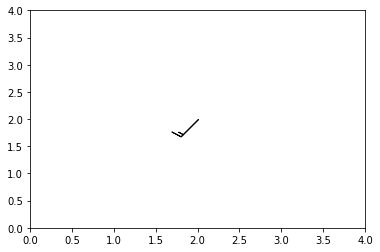

In [16]:
from matplotlib import pyplot
import numpy as np

# Make a 5x5 grid of missing u,v values
u = np.ma.masked_equal(np.zeros((5,5)), 0)
v = np.ma.masked_equal(np.zeros((5,5)), 0)

# Add u,v winds to center of domain
u[2,2] = 10.0
v[2,2] = 10.0

# Draw a single wind barb in the middle using pyplot API
# Note:  the axes objects are "hidden" in these functions
fig = pyplot.figure()
pyplot.barbs(u, v)

# Set the x and y ranges so the barb is in the middle
pyplot.xlim(0, 4)
pyplot.ylim(0, 4)

pyplot.show()

## Example 4.2: Single Wind Barb Using the Axes Object

This is the same example as before, but now the Axes objects are used directly, rather than the pure pyplot API.

Often you'll use a mix of pyplot and the object API when working with matplotlib, especially when making panel plots.

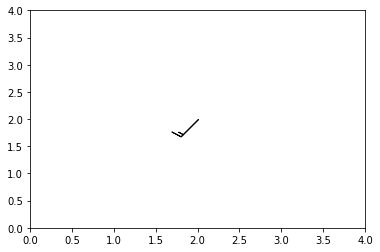

In [17]:
from matplotlib import pyplot
import numpy as np

# Make a 5x5 grid of missing u,v values
u = np.ma.masked_equal(np.zeros((5,5)), 0)
v = np.ma.masked_equal(np.zeros((5,5)), 0)

# Add u,v winds to center of domain
u[2,2] = 10.0
v[2,2] = 10.0

# We'll use pyplot to create the figure and 
# get the axes
fig = pyplot.figure()
ax = pyplot.axes() # <- Remember this line

# Now use the axes directly to create the barbs
ax.barbs(u, v)

# Set the x and y ranges using the axes directly
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

pyplot.show()

## Example 4.3: Making a Plot of Terrain

In this example, terrain is plotted.  Plotting terrain is a good way of checking that your data is mapped correctly.

Note:  The first time you run this code, you will need to be connected to the internet so that cartopy can download the map background shapefiles.

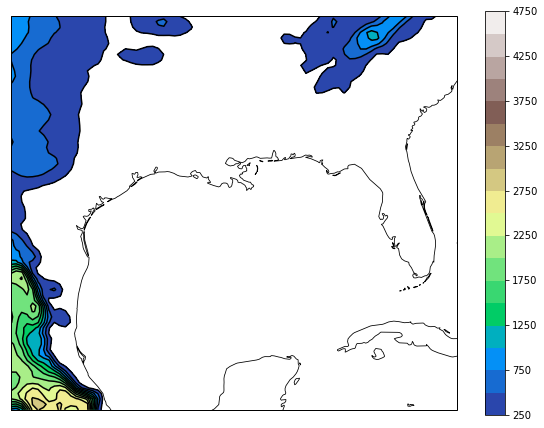

In [18]:
import numpy
from matplotlib import pyplot
from matplotlib.cm import get_cmap
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords

file_path = single_wrf_file()
wrf_file = Dataset(file_path)

# Get the terrain height
terrain = getvar(wrf_file, "ter", timeidx=0)

# Get the cartopy object and the lat,lon coords
cart_proj = get_cartopy(terrain)
lats, lons = latlon_coords(terrain)

# Create a figure and get the GetAxes object
fig = pyplot.figure(figsize=(10, 7.5))
geo_axes = pyplot.axes(projection=cart_proj)

# Download and add the states and coastlines
# See the cartopy documentation for more on this.
states = NaturalEarthFeature(category='cultural', 
                             scale='50m', 
                             facecolor='none',
                             name='admin_1_states_provinces_shp')
geo_axes.add_feature(states, linewidth=.5)
geo_axes.coastlines('50m', linewidth=0.8)

# Set the contour levels
levels = numpy.arange(250., 5000., 250.)

# Make the contour lines and fill them.
pyplot.contour(to_np(lons), to_np(lats), 
               to_np(terrain), levels=levels, 
               colors="black",
               transform=crs.PlateCarree())
pyplot.contourf(to_np(lons), to_np(lats), 
                to_np(terrain), levels=levels,
                transform=crs.PlateCarree(),
                cmap=get_cmap("terrain"))
             
# Add a color bar. The shrink often needs to be set 
# by trial and error.
pyplot.colorbar(ax=geo_axes, shrink=.99)

pyplot.show()

## Example 4.4: Full Plot of Sea Level Pressure

In this example, sea level pressure is plotted for the full domain.

The following examples show how to crop this figure.

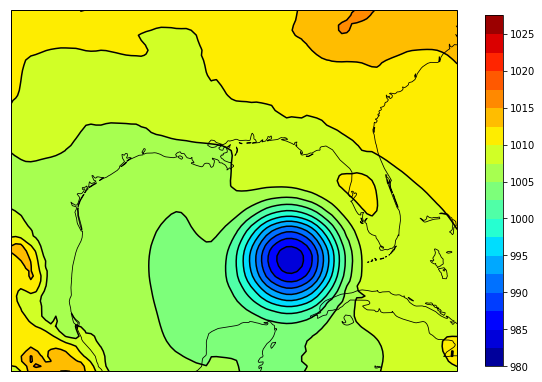

In [19]:
import numpy
from matplotlib import pyplot
from matplotlib.cm import get_cmap
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords

file_path = single_wrf_file()
wrf_file = Dataset(file_path)

# Get the sea level pressure
slp = getvar(wrf_file, "slp", timeidx=0)

# Get the cartopy object and the lat,lon coords
cart_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

# Create a figure and get the GetAxes object
fig = pyplot.figure(figsize=(10, 7.5))
geo_axes = pyplot.axes(projection=cart_proj)

# Download and add the states and coastlines
# See the cartopy documentation for more on this.
states = NaturalEarthFeature(category='cultural', 
                             scale='50m', 
                             facecolor='none',
                             name='admin_1_states_provinces_shp')
geo_axes.add_feature(states, linewidth=.5)
geo_axes.coastlines('50m', linewidth=0.8)

# Set the contour levels so that all plots match
levels = numpy.arange(980.,1030.,2.5)

# Make the contour lines and fill them.
pyplot.contour(to_np(lons), to_np(lats), 
               to_np(slp), levels=levels, colors="black",
               transform=crs.PlateCarree())
pyplot.contourf(to_np(lons), to_np(lats), 
                to_np(slp), levels=levels, 
                transform=crs.PlateCarree(),
                cmap=get_cmap("jet"))
             
# Add a color bar. The shrink often needs to be set 
# by trial and error.
pyplot.colorbar(ax=geo_axes, shrink=.86)

pyplot.show()

## Example 4.5: Cropping by Slicing the Data

In this example, the data is cropped to the lower right quadrant using slicing before plotting.

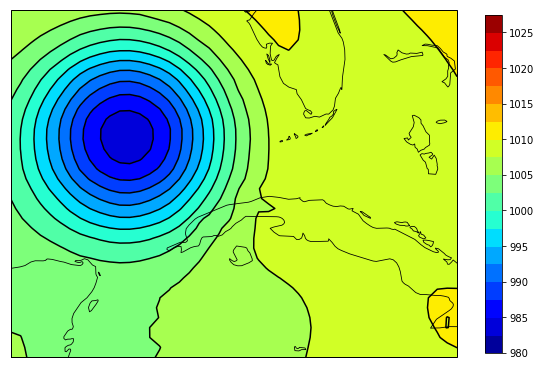

In [20]:
import numpy
from matplotlib import pyplot
from matplotlib.cm import get_cmap
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords

file_path = single_wrf_file()
wrf_file = Dataset(file_path)

# Get the sea level pressure
slp = getvar(wrf_file, "slp", timeidx=0)

# Determine the center of the domain in grid coordinates
slp_shape = slp.shape
center_y = int(slp_shape[-2]/2.) - 1
center_x = int(slp_shape[-1]/2.) - 1

# Slice from bottom to middle for y
# Slice from middle to right for x
slp_quad = slp[..., 0:center_y+1, center_x:]

# Get the cartopy object and the lat,lon coords
cart_proj = get_cartopy(slp_quad)
lats, lons = latlon_coords(slp_quad)

# Create a figure and get the GetAxes object
fig = pyplot.figure(figsize=(10, 7.5))
geo_axes = pyplot.axes(projection=cart_proj)

# Download and add the states and coastlines
# See the cartopy documentation for more on this.
states = NaturalEarthFeature(category='cultural', 
                             scale='50m', 
                             facecolor='none',
                             name='admin_1_states_provinces_shp')
geo_axes.add_feature(states, linewidth=.5)
geo_axes.coastlines('50m', linewidth=0.8)

# Set the contour levels so that all plots match
levels = numpy.arange(980.,1030.,2.5)

# Make the contour lines and fill them.
pyplot.contour(to_np(lons), to_np(lats), 
               to_np(slp_quad), levels=levels, colors="black",
               transform=crs.PlateCarree())
pyplot.contourf(to_np(lons), to_np(lats), 
                to_np(slp_quad), levels=levels, 
                transform=crs.PlateCarree(),
                cmap=get_cmap("jet"))
             
# Add a color bar. The shrink often needs to be set 
# by trial and error.
pyplot.colorbar(ax=geo_axes, shrink=.83)

pyplot.show()

## Example 4.6: Cropping by Setting the X,Y Extents

In this example, the plot is cropped to the lower right quardrant by setting x and y axis extents.

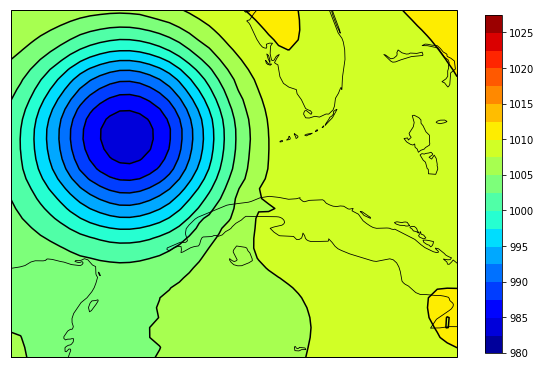

In [21]:
import numpy
from matplotlib import pyplot
from matplotlib.cm import get_cmap
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords
from wrf import xy_to_ll, cartopy_xlim, cartopy_ylim
from wrf import CoordPair, GeoBounds

file_path = single_wrf_file()
wrf_file = Dataset(file_path)

# Get the sea level pressure
slp = getvar(wrf_file, "slp", timeidx=0)

# Get the cartopy object and the lat,lon coords
cart_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

# Create a figure and get the GetAxes object
fig = pyplot.figure(figsize=(10, 7.5))
geo_axes = pyplot.axes(projection=cart_proj)

# Download and add the states and coastlines
# See the cartopy documentation for more on this.
states = NaturalEarthFeature(category='cultural', 
                             scale='50m', 
                             facecolor='none',
                             name='admin_1_states_provinces_shp')
geo_axes.add_feature(states, linewidth=.5)
geo_axes.coastlines('50m', linewidth=0.8)

# Set the contour levels so that all plots match
levels = numpy.arange(980.,1030.,2.5)

# Make the contour lines and fill them.
pyplot.contour(to_np(lons), to_np(lats), 
               to_np(slp), levels=levels, colors="black",
               transform=crs.PlateCarree())
pyplot.contourf(to_np(lons), to_np(lats), 
                to_np(slp), levels=levels, 
                transform=crs.PlateCarree(),
                cmap=get_cmap("jet"))
             
# Add a color bar. The shrink often needs to be set 
# by trial and error.
pyplot.colorbar(ax=geo_axes, shrink=.83)

# Set up the x, y extents

# Determine the center of the domain in grid coordinates
slp_shape = slp.shape
start_y = 0
center_y = int(slp_shape[-2]/2.) - 1
center_x = int(slp_shape[-1]/2.) - 1
end_x = int(slp_shape[-1]) - 1

# Get the lats and lons for the start, center, and end points
# (Normally you would just set these yourself)
center_latlon = xy_to_ll(wrf_file, 
                         [center_x, end_x], 
                         [start_y, center_y])

start_lat = center_latlon[0,0]
end_lat = center_latlon[0,1]
start_lon = center_latlon[1,0]
end_lon = center_latlon[1,1]

# Set the extents
geo_bounds = GeoBounds(CoordPair(lat=start_lat, lon=start_lon),
                       CoordPair(lat=end_lat, lon=end_lon))
geo_axes.set_xlim(cartopy_xlim(slp, geobounds=geo_bounds))
geo_axes.set_ylim(cartopy_ylim(slp, geobounds=geo_bounds))

pyplot.show()

# 5.0 OpenMP and Performance

The examples below gradually improve upon performance by using OpenMP, adjusting the scheduler, and using a variable cache.

## Example 5.1: Performance Improvement with OpenMP

In this example, all diagnostics are calculated using one thread, and then using the maximum number of threads available.

In [22]:
from time import time
from netCDF4 import Dataset
from wrf import (getvar, ALL_TIMES, omp_enabled, 
                 omp_get_num_procs, omp_set_num_threads)

if not omp_enabled():
    raise RuntimeError("OpenMP is not available in this build")

file_paths = multiple_wrf_files()

wrf_files = [Dataset(f) for f in file_paths]
    
vars = ("avo", "eth", "cape_2d", "cape_3d", "ctt", "dbz", "mdbz",
        "geopt", "helicity", "lat", "lon", "omg", "p", "pressure",
        "pvo", "pw", "rh2", "rh", "slp", "ter", "td2", "td", "tc",
        "theta", "tk", "tv", "twb", "updraft_helicity", "ua", "va",
        "wa", "uvmet10", "uvmet", "z", "cfrac")    

print("Running with a single CPU")

# Use 1 CPU
omp_set_num_threads(1)

start = time()

for var in vars:
    v = getvar(wrf_files, var, ALL_TIMES)
    
end = time()

print("Time taken: {} s".format(end-start))

print ("Running with {} CPUs".format(omp_get_num_procs()))

# Use Max CPUs
omp_set_num_threads(omp_get_num_procs())

start = time()

for var in vars:
    v = getvar(wrf_files, var, ALL_TIMES)
    
end = time()

print("Time taken: {} s".format(end-start))

Running with a single CPU
Time taken: 8.852997779846191 s
Running with 8 CPUs
Time taken: 5.239270925521851 s


## OpenMP Scheduling Types

WRF-Python uses *runtime* scheduling, which means that one of the scheduler types defined below must be set at runtime rather than compile time.

- **wrf.OMP_SCHED_STATIC**: Divide the loop in to equal-sized chunks (default chunk_size = loop_count/num_threads) 
  **[wrf-python default]**
- **wrf.OMP_SCHED_DYNAMIC**: Use internal loop queue to give a chunk-sized block of loop iterations to each thread. 
  When thread is finished, it retrieves next block to work on (default chunk_size = 1).
- **wrf.OMP_SCHED_GUIDED**: Similar to OMP_SCHED_DYNAMIC, but the chunk size starts off large and decreases to better 
  handle load imbalance between iterations. (default chunk_size = loop_count/num_threads)
- **wrf.OMP_SCHED_AUTO**: The decision regarding scheduling is delegated to the OpenMP implementation for the compiler
  (magic!)

## Example 5.2: OpenMP Scheduling Types

In this example, the various scheduler types are compared to see if performance is improved.

In [23]:
from time import time
from netCDF4 import Dataset
from wrf import (getvar, ALL_TIMES, omp_enabled, 
                 omp_get_num_procs, omp_set_num_threads,
                 omp_set_schedule, OMP_SCHED_STATIC,
                 OMP_SCHED_DYNAMIC, 
                 OMP_SCHED_GUIDED, OMP_SCHED_AUTO)

if not omp_enabled():
    raise RuntimeError("OpenMP is not available in this build")

file_paths = multiple_wrf_files()

wrf_files = [Dataset(f) for f in file_paths]
    
vars = ("avo", "eth", "cape_2d", "cape_3d", "ctt", "dbz", "mdbz",
        "geopt", "helicity", "lat", "lon", "omg", "p", "pressure",
        "pvo", "pw", "rh2", "rh", "slp", "ter", "td2", "td", "tc",
        "theta", "tk", "tv", "twb", "updraft_helicity", "ua", "va",
        "wa", "uvmet10", "uvmet", "z", "cfrac")    

omp_set_num_threads(omp_get_num_procs())

chunk_size = 0

sched_string_map = {int(OMP_SCHED_STATIC) : "OMP_SCHED_STATIC", 
                    int(OMP_SCHED_DYNAMIC) : "OMP_SCHED_DYNAMIC",  
                    int(OMP_SCHED_GUIDED) : "OMP_SCHED_GUIDED",
                    int(OMP_SCHED_AUTO) : "OMP_SCHED_AUTO"}

for sched in (OMP_SCHED_STATIC, OMP_SCHED_DYNAMIC, 
              OMP_SCHED_GUIDED, OMP_SCHED_AUTO):
    omp_set_schedule(sched, chunk_size)
    sched_string = sched_string_map[int(sched)]
    print("Running with sheduler: {}".format(sched_string))
    
    start = time()
    for var in vars:
        v = getvar(wrf_files, var, ALL_TIMES)
    end = time()
    
    print("Time taken using scheduler {}: {} s".format(sched_string, end-start))

Running with sheduler: OMP_SCHED_STATIC
Time taken using scheduler OMP_SCHED_STATIC: 5.468196153640747 s
Running with sheduler: OMP_SCHED_DYNAMIC
Time taken using scheduler OMP_SCHED_DYNAMIC: 6.614790916442871 s
Running with sheduler: OMP_SCHED_GUIDED
Time taken using scheduler OMP_SCHED_GUIDED: 5.505795240402222 s
Running with sheduler: OMP_SCHED_AUTO
Time taken using scheduler OMP_SCHED_AUTO: 6.222812175750732 s


## WRF-Python and Variable Extraction

- Everytime you call wrf.getvar, the variables needed for the calculation are extracted from the NetCDF file.
- The same variables are going to be extracted over and over and over and over and...
- To prevent this, you can use the *cache* argument to getvar.

## The cache Argument to getvar

- Normally used internally so that variables containing metadata aren't extracted more than once.
- Can also be used to prevent the repeated extraction of common variables.
- Should be a dictionary of variable name to variable data.
- Good variables to use: **P, PB, PH, PHB, T, QVAPOR, HGT, PSFC, U, V, W**.

## Example 5.3: Using the cache Argument

In this example, a variable cache is used to show how much performance can be improved by removing the variable extraction cost. The scheduler types are compared as in the previous example.

In [24]:
from time import time
from netCDF4 import Dataset
from wrf import (getvar, extract_vars, ALL_TIMES, omp_enabled, 
                 omp_get_num_procs, omp_set_num_threads,
                 omp_set_schedule, OMP_SCHED_STATIC,
                 OMP_SCHED_DYNAMIC, 
                 OMP_SCHED_GUIDED, OMP_SCHED_AUTO)

if not omp_enabled():
    raise RuntimeError("OpenMP is not available in this build")

file_paths = multiple_wrf_files()

wrf_files = [Dataset(f) for f in file_paths]

cache = extract_vars(wrf_files, ALL_TIMES, 
                     ("P", "PSFC", "PB", "PH", "PHB",
                      "T", "QVAPOR", "HGT", "U", "V",
                      "W"))
    
vars = ("avo", "eth", "cape_2d", "cape_3d", "ctt", "dbz", "mdbz",
        "geopt", "helicity", "lat", "lon", "omg", "p", "pressure",
        "pvo", "pw", "rh2", "rh", "slp", "ter", "td2", "td", "tc",
        "theta", "tk", "tv", "twb", "updraft_helicity", "ua", "va",
        "wa", "uvmet10", "uvmet", "z", "cfrac")    

omp_set_num_threads(omp_get_num_procs())

chunk_size = 0

sched_string_map = {int(OMP_SCHED_STATIC) : "OMP_SCHED_STATIC", 
                    int(OMP_SCHED_DYNAMIC) : "OMP_SCHED_DYNAMIC",  
                    int(OMP_SCHED_GUIDED) : "OMP_SCHED_GUIDED",
                    int(OMP_SCHED_AUTO) : "OMP_SCHED_AUTO"}

for sched in (OMP_SCHED_STATIC, OMP_SCHED_DYNAMIC, 
              OMP_SCHED_GUIDED, OMP_SCHED_AUTO):
    omp_set_schedule(sched, chunk_size)
    sched_string = sched_string_map[int(sched)]
    print("Running with sheduler: {}".format(sched_string))
    
    start = time()
    for var in vars:
        v = getvar(wrf_files, var, ALL_TIMES, cache=cache)
    end = time()
    
    print("Time taken using scheduler {}: {} s".format(sched_string, end-start))

Running with sheduler: OMP_SCHED_STATIC
Time taken using scheduler OMP_SCHED_STATIC: 4.066900968551636 s
Running with sheduler: OMP_SCHED_DYNAMIC
Time taken using scheduler OMP_SCHED_DYNAMIC: 5.521826982498169 s
Running with sheduler: OMP_SCHED_GUIDED
Time taken using scheduler OMP_SCHED_GUIDED: 4.004973888397217 s
Running with sheduler: OMP_SCHED_AUTO
Time taken using scheduler OMP_SCHED_AUTO: 4.474869966506958 s


# 6.0 Advanced Examples

These examples are a lot more complicated than the previous examples, but you might find them more useful in the real world.  

We probably won't have time to cover these in the tutorial, so hang on to them for future reference.

## Example 6.1: Overlaying Multiple Diagnostics

In this example, we're going to add winds and dewpoint to the SLP plot from above.  

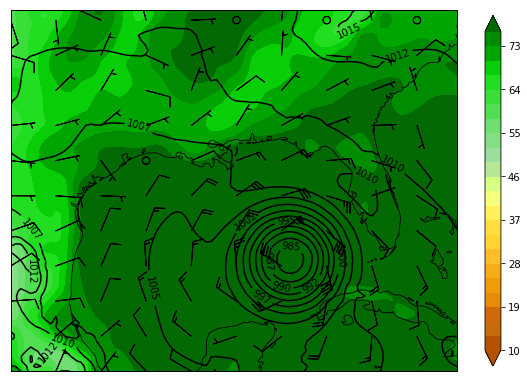

In [25]:
import numpy
from matplotlib import pyplot
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, cartopy_xlim, cartopy_ylim

file_path = single_wrf_file()
wrf_file = Dataset(file_path)

# Get the slp, td2, u, and v variables
slp = getvar(wrf_file, "slp", timeidx=0)
td2 = getvar(wrf_file, "td2", timeidx=0, units="degF")
u_sfc = getvar(wrf_file, "ua", timeidx=0, units="kt")[0,:]
v_sfc = getvar(wrf_file, "va", timeidx=0, units="kt")[0,:]

# Get the cartopy object and the lat,lon coords
cart_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

# Create a figure and get the GetAxes object
fig = pyplot.figure(figsize=(10, 7.5))
geo_axes = pyplot.axes(projection=cart_proj)

# Download and add the states and coastlines
# See the cartopy documentation for more on this.
states = NaturalEarthFeature(category='cultural', 
                             scale='50m', 
                             facecolor='none',
                             name='admin_1_states_provinces_shp')
geo_axes.add_feature(states, linewidth=.5)
geo_axes.coastlines('50m', linewidth=0.8)

# Manually setting the contour levels
slp_levels = numpy.arange(980.,1030.,2.5)
td2_levels = numpy.arange(10., 79., 3.)


# Manually setting the td2 RGB colors (normalized to 1)
td2_rgb = numpy.array([[181,82,0], [181,82,0],
                       [198,107,8], [206,107,8],
                       [231,140,8], [239,156,8],
                       [247,173,24], [255,189,41],
                       [255,212,49], [255,222,66],
                       [255,239,90], [247,255,123],
                       [214,255,132], [181,231,148],
                       [156,222,156], [132,222,132],
                       [112,222,112], [82,222,82],
                       [57,222,57], [33,222,33],
                       [8,206,8], [0,165,0],
                       [0,140,0], [3,105,3]]) / 255.0
    
td2_cmap, td2_norm = from_levels_and_colors(td2_levels, td2_rgb, extend="both")

# Make the contour lines and fill them.
slp_contours = pyplot.contour(to_np(lons), 
                              to_np(lats), 
                              to_np(slp), 
                              levels=slp_levels, 
                              colors="black",
                              transform=crs.PlateCarree())

pyplot.contourf(to_np(lons), to_np(lats), 
                to_np(td2), levels=td2_levels, 
                cmap=td2_cmap, norm=td2_norm,
                extend="both",
                transform=crs.PlateCarree())

# Plot the wind barbs, but only plot ~10 barbs in each direction.
thin = [int(x/10.) for x in lons.shape]
pyplot.barbs(to_np(lons[::thin[0], ::thin[1]]), 
             to_np(lats[::thin[0], ::thin[1]]), 
             to_np(u_sfc[::thin[0], ::thin[1]]), 
             to_np(v_sfc[::thin[0], ::thin[1]]),
             transform=crs.PlateCarree())

# Add contour labels for pressure
pyplot.clabel(slp_contours, fmt="%i")

# Add a color bar. The shrink often needs to be set 
# by trial and error.
pyplot.colorbar(ax=geo_axes, shrink=.86, extend="both")

# Set the map bounds
pyplot.xlim(cartopy_xlim(slp))
pyplot.ylim(cartopy_ylim(slp))

pyplot.show()

## Example 6.2: 850 hPa Heights and Winds with interplevel

In this example, the 850 hPa heights are plotted with wind barbs.

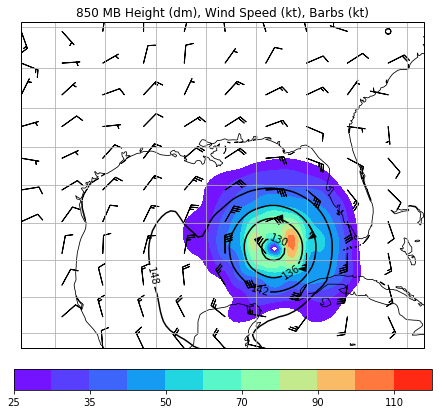

In [26]:
import numpy
from matplotlib import pyplot
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, interplevel,
                 cartopy_xlim, cartopy_ylim)

file_path = single_wrf_file()
wrf_file = Dataset(file_path)

# Extract the pressure, geopotential height, and wind variables
p = getvar(wrf_file, "pressure")
z = getvar(wrf_file, "z", units="dm")
ua = getvar(wrf_file, "ua", units="kt")
va = getvar(wrf_file, "va", units="kt")
wspd = getvar(wrf_file, "wspd_wdir", units="kt")[0,:]

# Interpolate geopotential height, u, and v winds to 850 hPa
ht_850 = interplevel(z, p, 850)
u_850 = interplevel(ua, p, 850)
v_850 = interplevel(va, p, 850)
wspd_850 = interplevel(wspd, p, 850)

# Get the lat/lon coordinates
lats, lons = latlon_coords(ht_850)

# Get the map projection information
cart_proj = get_cartopy(ht_850)

# Create the figure
fig = pyplot.figure(figsize=(10,7.5))
ax = pyplot.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category='cultural', 
                             scale='50m', 
                             facecolor='none',
                             name='admin_1_states_provinces_shp')
ax.add_feature(states, linewidth=0.5)
ax.coastlines('50m', linewidth=0.8)

# Add the 850 hPa geopotential height contours
levels = numpy.arange(130., 170., 6.)
contours = pyplot.contour(to_np(lons), 
                          to_np(lats), 
                          to_np(ht_850), 
                          levels=levels, 
                          colors="black",
                          transform=crs.PlateCarree())

pyplot.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the wind speed contours
levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
wspd_contours = pyplot.contourf(to_np(lons), 
                                to_np(lats), 
                                to_np(wspd_850), 
                                levels=levels,
                                cmap=get_cmap("rainbow"),
                                transform=crs.PlateCarree())

pyplot.colorbar(wspd_contours, ax=ax, orientation="horizontal", 
             pad=.05, shrink=.75)

# Add the 850 hPa wind barbs, only plotting 10 barbs in each direction
# Also, skipping the border barbs.
thin = [int(x/10.) for x in lons.shape]
pyplot.barbs(to_np(lons[::thin[0], ::thin[1]]), 
             to_np(lats[::thin[0], ::thin[1]]), 
             to_np(u_850[::thin[0], ::thin[1]]),
             to_np(v_850[::thin[0], ::thin[1]]), 
             length=6,
             transform=crs.PlateCarree())

# Set the map bounds
ax.set_xlim(cartopy_xlim(ht_850))
ax.set_ylim(cartopy_ylim(ht_850))

ax.gridlines()

pyplot.title("850 MB Height (dm), Wind Speed (kt), Barbs (kt)")

pyplot.show()

## Example 6.3: Cross Section Panel Plot

In this example, a panel plot is created with one plot showing sea level pressure with the horizontal cross section line, and the second plot is a vertical cross section for radar reflectivity.

First, in the cell below, define your cross section in latitude,longitude coordinates.

In [27]:
from wrf import CoordPair

cross_start = CoordPair(lat=27.1, lon=-91.7)
cross_end = CoordPair(lat=27.1, lon=-86.7)

Note: If you modified the cell above, the original values were:

``` python
cross_start = CoordPair(lat=27.1, lon=-91.7)
cross_end = CoordPair(lat=27.1, lon=-86.7)
```

Now run the cell below to generate a cross section plot of reflectivity.

(Also remember to run the cell below again if you make changes to the cross section start and end points)

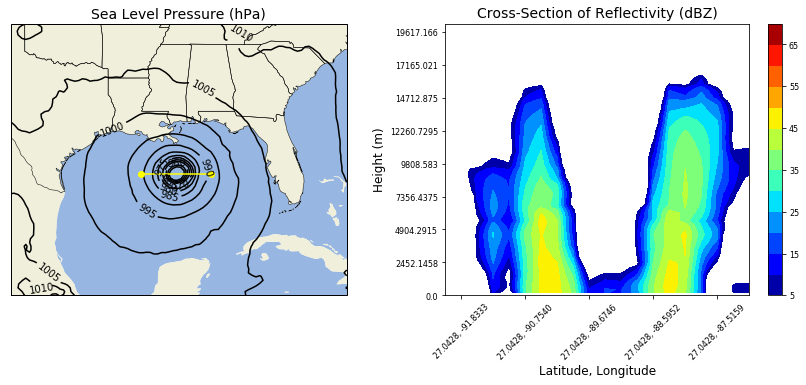

In [28]:
import numpy
from matplotlib import pyplot
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim)

file_path = multiple_wrf_files()
wrf_file = [Dataset(x) for x in file_path]

# Get the WRF variables
slp = getvar(wrf_file, "slp", timeidx=-1)
z = getvar(wrf_file, "z", timeidx=-1)
dbz = getvar(wrf_file, "dbz", timeidx=-1)
Z = 10**(dbz/10.) # Use linear Z for interpolation

# Compute the vertical cross-section interpolation.  Also, include the lat/lon
# points along the cross-section in the metadata by setting latlon to True.
z_cross = vertcross(Z, z, wrfin=wrf_file, 
                    start_point=cross_start, 
                    end_point=cross_end,
                    latlon=True, meta=True)

# Convert back to dBz after interpolation
dbz_cross = 10.0 * numpy.log10(z_cross)

# Get the lat/lon points
lats, lons = latlon_coords(slp)

# Get the cartopy projection object
cart_proj = get_cartopy(slp)

# Create a figure that will have 2 subplots (1 row, 2 columns)
fig = pyplot.figure(figsize=(15,5))
ax_slp = fig.add_subplot(1,2,1,projection=cart_proj)
ax_dbz = fig.add_subplot(1,2,2)

# Download and create the states, land, and oceans using cartopy features
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
land = NaturalEarthFeature(category='physical', name='land', scale='50m',
                           facecolor=COLORS['land'])
ocean = NaturalEarthFeature(category='physical', name='ocean', scale='50m',
                            facecolor=COLORS['water'])

# Make the pressure contours
slp_levels = numpy.arange(950.,1030.,5)
slp_contours = ax_slp.contour(to_np(lons), 
                              to_np(lats), 
                              to_np(slp), 
                              levels=slp_levels, 
                              colors="black", 
                              zorder=3, 
                              transform=crs.PlateCarree())
# Add contour labels for pressure
ax_slp.clabel(slp_contours, fmt="%i")

# Draw the cross section line
ax_slp.plot([cross_start.lon, cross_end.lon], 
            [cross_start.lat, cross_end.lat],
            color="yellow", 
            marker="o",  
            zorder=3,
            transform=crs.PlateCarree())

# Draw the oceans, land, and states
ax_slp.add_feature(ocean)
ax_slp.add_feature(land)
ax_slp.add_feature(states, linewidth=.5, edgecolor="black")

# Make the contour plot for dbz
dbz_levels = numpy.arange(5.,75.,5.)
dbz_contours = ax_dbz.contourf(to_np(dbz_cross), levels=dbz_levels, cmap=get_cmap("jet"))
cb_dbz = fig.colorbar(dbz_contours, ax=ax_dbz)
cb_dbz.ax.tick_params(labelsize=8)

# Set the x-ticks to use latitude and longitude labels
coord_pairs = to_np(dbz_cross.coords["xy_loc"])
x_ticks = numpy.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str() for pair in to_np(coord_pairs)]
# Only keeping ~5 xticks
thin = [int(x/5.) for x in x_ticks.shape]
ax_dbz.set_xticks(x_ticks[1::thin[0]])
ax_dbz.set_xticklabels(x_labels[::thin[0]], rotation=45, fontsize=8)

# Set the y-ticks to be height
vert_vals = to_np(dbz_cross.coords["vertical"])
v_ticks = numpy.arange(vert_vals.shape[0])
# Only keeping ~8 vertical ticks
thin = [int(x/8.) for x in v_ticks.shape]
ax_dbz.set_yticks(v_ticks[::thin[0]])
ax_dbz.set_yticklabels(vert_vals[::thin[0]], fontsize=8)

# Set the x-axis and  y-axis labels
ax_dbz.set_xlabel("Latitude, Longitude", fontsize=12)
ax_dbz.set_ylabel("Height (m)", fontsize=12)

# Add a title
ax_slp.set_title("Sea Level Pressure (hPa)", {"fontsize" : 14})
ax_dbz.set_title("Cross-Section of Reflectivity (dBZ)", {"fontsize" : 14})

pyplot.show()

## Example 6.4: Animations

In this example, an animation of sea level pressure is generated.

To make animations, the ffmpeg package can be used to make movies, but for this example we're going to make a Javascript animation.

To create an animation, you have to define a function that generates the frames (in this example it is named *animate*).

You pass this animation function to the FuncAnimation object.

You must also supply some kind of generator that passes the arguments to the animate function, or you can just supply an integer and the FuncAnimation object will use the range() function.  In this case, we're just generating integer values which represents the Time index.

To render the animation in a jupyter notebook, we make use of the HTML object from Ipython.display and the *to_jshtml* method for the FuncAnimation object to make the Javascript frame animator. If you have ffmpeg installed, you can use the *to_html5_video* to make an HTML5 movie instead.

Below the animation will also be a static image of the pressure contours. I haven't yet figured out how to prevent this, so don't worry about it for now.

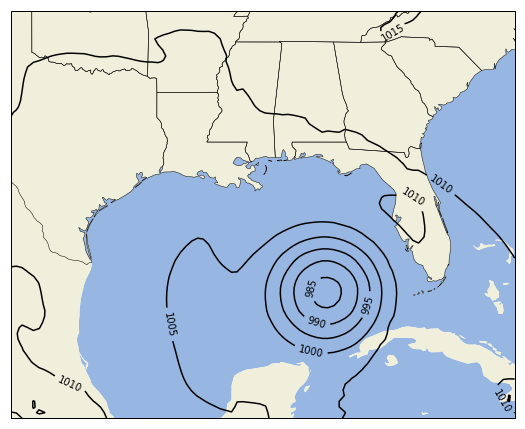

In [29]:
import numpy
from matplotlib import pyplot, rc
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim, ALL_TIMES)

file_path = multiple_wrf_files()
wrf_file = [Dataset(f) for f in file_path]

# Get SLP for all times
slp_all = getvar(wrf_file, "slp", timeidx=ALL_TIMES)

# Get the cartopy projection object
cart_proj = get_cartopy(slp_all)

fig = pyplot.figure(figsize=(10,7.5))
ax_slp = pyplot.axes(projection=cart_proj)

# Download and create the states, land, and oceans using cartopy features
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                                      name='admin_1_states_provinces_shp')
land = NaturalEarthFeature(category='physical', name='land', scale='50m',
                                    facecolor=COLORS['land'])
ocean = NaturalEarthFeature(category='physical', name='ocean', scale='50m',
                                     facecolor=COLORS['water'])

slp_levels = numpy.arange(950.,1030.,5.)

num_frames = slp_all.shape[0]

# This function is called for each frame of the animation, where
# i is the frame index. Here is where the animation frames need 
# to be created.
def animate(i):
    ax_slp.clear()
    slp = slp_all[i,:]
    
    # Get the lat/lon coordinates
    lats, lons = latlon_coords(slp)
    
    ax_slp.add_feature(ocean)
    ax_slp.add_feature(land)
    ax_slp.add_feature(states, linewidth=.5, edgecolor="black")
    
    slp_contours = ax_slp.contour(to_np(lons), 
                                  to_np(lats), 
                                  to_np(slp), 
                                  levels=slp_levels,
                                  colors="black", 
                                  zorder=5,
                                  transform=crs.PlateCarree()) 
    
    # Add contour labels for pressure
    ax_slp.clabel(slp_contours, fmt="%i")
    
    # Set the map bounds
    ax_slp.set_xlim(cartopy_xlim(slp))
    ax_slp.set_ylim(cartopy_ylim(slp))
        
    return ax_slp

# Create the animation by supplying a figure, the animation object, the number of frames
# and an interval in milliseconds that is the delay between frames.
ani = FuncAnimation(fig, animate, num_frames, interval=500)

# To work with jupyter notebook, you need to use the HTML generated
# by the HTML function from the IPython.display package.
# If you change 'to_jshtml' to be 'to_html5_video', you will get an HTML5 video instead.

#HTML(ani.to_html5_video())
HTML(ani.to_jshtml())

